In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## General

In [68]:
df = pd.read_csv('csv/all/csv_c5000_n100_r5000_fn100_mode0_div100_cut40.csv') #OK
df['div_error'] = abs(df['resFmin'] - df['resOpt_v1_1_div'])
df['cut_error'] = abs(df['resFmin'] - df['resOpt_v2_1_cut'])
print(df.columns)
print(df['type'].unique())

Index(['type', 'capacity', 'n', 'mincap_v1_1_div_time', 't_size_v1',
       's_size_v1', 'mincap_v1_time', 't_size_v2', 's_size_v2',
       'mincap_v2_time', 't_size_v1_1', 's_size_v1_1', 'mincap_v1_1_time',
       't_size_v2_1', 's_size_v2_1', 'mincap_v2_1_time', 't_size_v1_1_div',
       's_size_v1_1_div', 'mincap_v1_1_div_time.1', 't_size_v2_1_cut',
       's_size_v2_1_cut', 'mincap_v2_1_cut_time', 'time_original',
       'time_original_allocation', 'time_original_prealloc',
       'res_original_alloc', 'time_ks2_v2_allocation', 'time_ks2_v2',
       'resOpt_v2', 'time_ks2_v1_allocation', 'time_ks2_v1', 'resOpt_v1',
       'time_ks2_v1_allocation_1', 'time_ks2_v1_1', 'resOpt_v1_1',
       'time_ks2_v2_allocation_1', 'time_ks2_v2_1', 'resOpt_v2_1',
       'time_ks2_v1_allocation_1_div', 'time_ks2_v1_1_div', 'resOpt_v1_1_div',
       'time_ks2_allocation_1_cut', 'time_ks2_v2_1_cut', 'resOpt_v2_1_cut',
       'time_ks2_v1_nocol_noalloc', 'time_fminknap_allocation',
       'time_fminkna

Senza noalloc no mincap


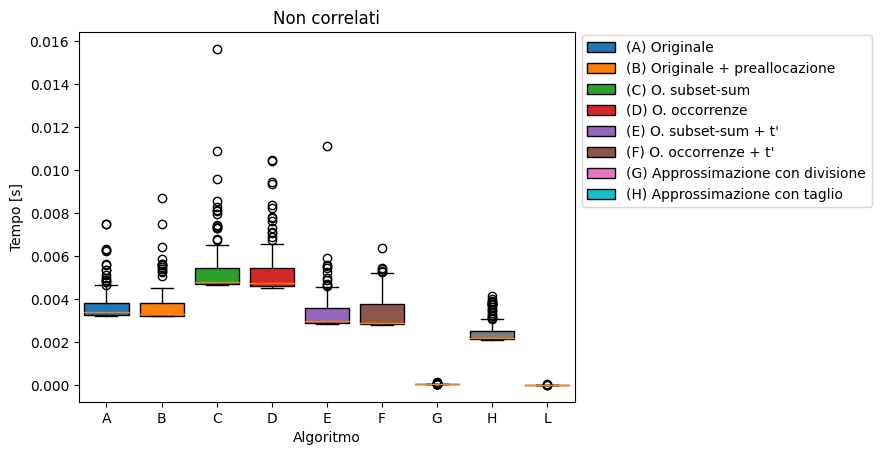

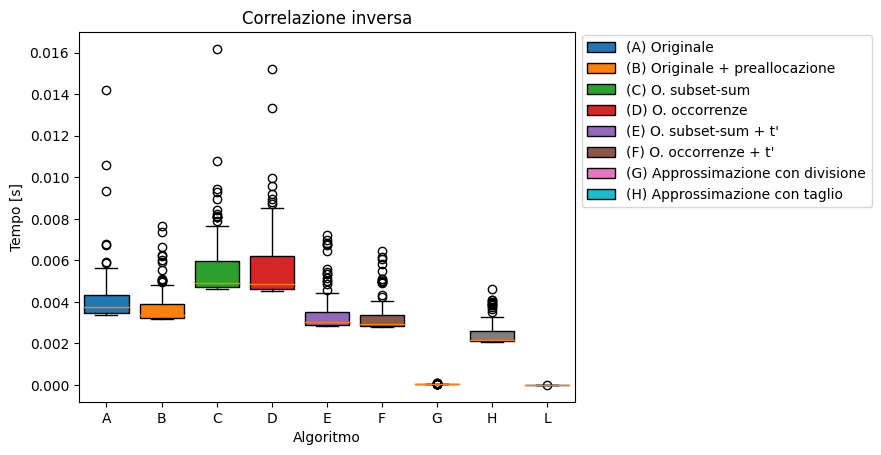

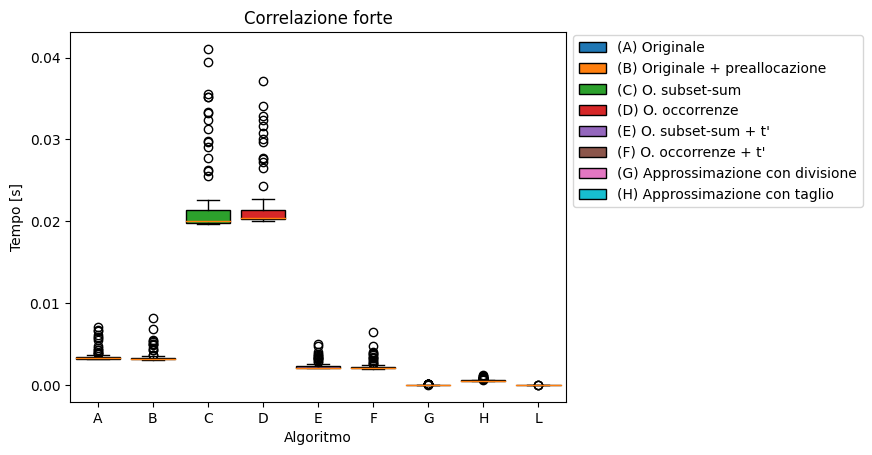

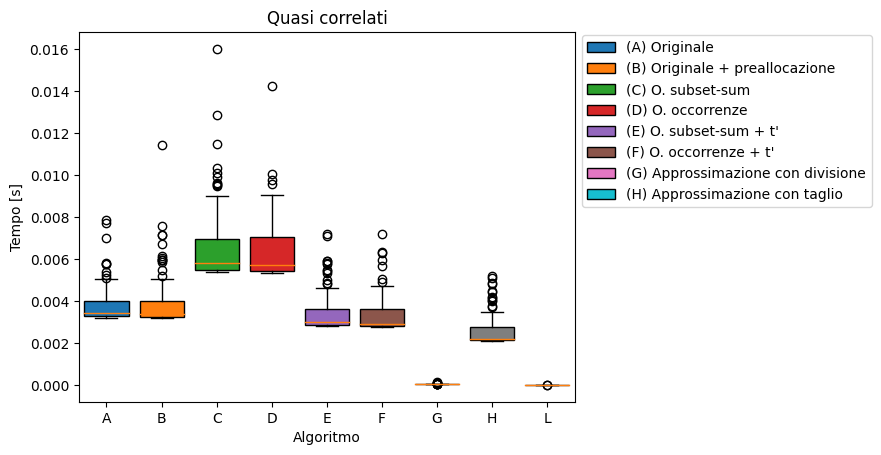

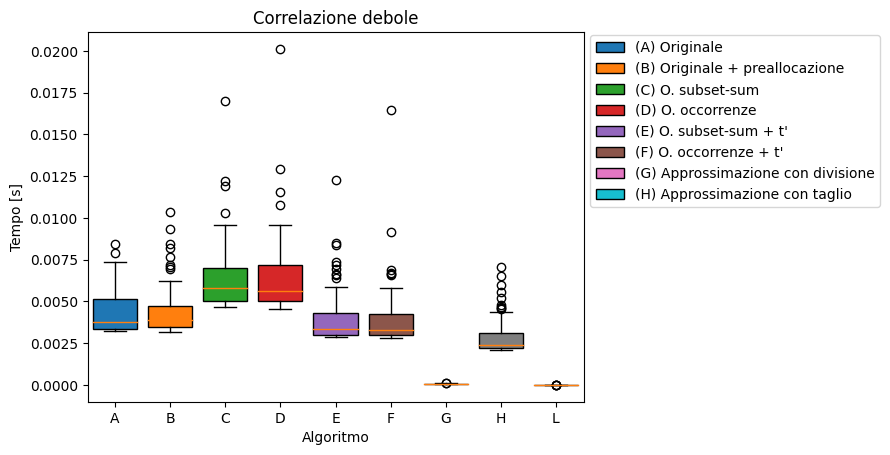

In [71]:
# bar, boxplots con confronto tempistiche generale + per tipo (OK)
means_by_type = df.groupby('type').mean()
types = df['type'].unique()
#types_conv = ['Non correlati', 'Quasi correlati', 'Inversamente correlati', 'time_ks2_v1', 'time_ks2_v2_1','time_ks2_v1_1_div','time_ks2_v2_1_cut','time_ks2_v1_nocol_noalloc','time_fminknap']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']
cols_time = ['time_original', 'time_original_prealloc', 'time_ks2_v2', 'time_ks2_v1', 'time_ks2_v2_1','time_ks2_v1_1_div','time_ks2_v2_1_cut','time_ks2_v1_nocol_noalloc','time_fminknap']

# tutti
# print("Tutti")
# for nr, i in enumerate(types):
#     fig, ax = plt.subplots()
#     # Creazione dei boxplot
#     val = df[df['type'] == i]
#     bp1 = ax.boxplot(val['time_original'], positions=[-5], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C0'))
#     bp2 = ax.boxplot(val['time_original_prealloc'], positions=[-4], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C1'))
#     bp3 = ax.boxplot(val['time_ks2_v1'], positions=[-3], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C2'))
#     bp4 = ax.boxplot(val['time_ks2_v2'], positions=[-2], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C3'))
#     bp5 = ax.boxplot(val['time_ks2_v1_1'], positions=[-1], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C4'))
#     bp6 = ax.boxplot(val['time_ks2_v2_1'], positions=[0], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C5'))
#     bp7 = ax.boxplot(val['time_ks2_v1_1_div'], positions=[1], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C6'))
#     bp8 = ax.boxplot(val['time_ks2_v2_1_cut'], positions=[2], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C7'))
#     bp9 = ax.boxplot(val['time_ks2_v1_nocol_noalloc'], positions=[3], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C8'))
#     bp10 = ax.boxplot(val['time_fminknap'], positions=[4], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C9'))
#     ax.set_xticklabels(['A','B','C','D','E','F','G','H','I','L'])
#     ax.set_xlabel('Algoritmo')
#     ax.set_ylabel('Tempo [s]')
#     plt.title(f"{types_conv[nr]}")
#     ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0], bp5["boxes"][0], bp6["boxes"][0], bp7["boxes"][0], bp8["boxes"][0], bp9["boxes"][0], bp10["boxes"][0]], ['(A) Originale', '(B) Originale + preallocazione', '(C) O. subset-sum', '(D) O. occorrenze', '(E) O. subset-sum + t\'', '(F) O. occorrenze + t\'', '(G) Approssimazione con divisione', '(H) Approssimazione con taglio', '(I) Calcolo subset sum + esecuzione senza prealloc.', '(L) minknap' ], loc='upper left', bbox_to_anchor=(1.00, 1.01))
#     plt.show()

# senza no alloc no mincap
print("Senza noalloc no mincap")
for nr, i in enumerate(types):
    fig, ax = plt.subplots()
    # Creazione dei boxplot
    val = df[df['type'] == i]
    bp1 = ax.boxplot(val['time_original'], positions=[-5], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C0'))
    bp2 = ax.boxplot(val['time_original_prealloc'], positions=[-4], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C1'))
    bp3 = ax.boxplot(val['time_ks2_v1'], positions=[-3], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C2'))
    bp4 = ax.boxplot(val['time_ks2_v2'], positions=[-2], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C3'))
    bp5 = ax.boxplot(val['time_ks2_v1_1'], positions=[-1], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C4'))
    bp6 = ax.boxplot(val['time_ks2_v2_1'], positions=[0], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C5'))
    bp7 = ax.boxplot(val['time_ks2_v1_1_div'], positions=[1], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C6'))
    bp8 = ax.boxplot(val['time_ks2_v2_1_cut'], positions=[2], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C7'))
    bp10 = ax.boxplot(val['time_fminknap'], positions=[3], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C9'))
    # Personalizzazione degli assi e della legenda
    ax.set_xticklabels(['A','B','C','D','E','F','G','H','L'])
    ax.set_xlabel('Algoritmo')
    ax.set_ylabel('Tempo [s]')
    plt.title(f"{types_conv[nr]}")
    ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0], bp5["boxes"][0], bp6["boxes"][0], bp7["boxes"][0], bp10["boxes"][0]], ['(A) Originale', '(B) Originale + preallocazione', '(C) O. subset-sum', '(D) O. occorrenze', '(E) O. subset-sum + t\'', '(F) O. occorrenze + t\'', '(G) Approssimazione con divisione', '(H) Approssimazione con taglio', '(L) minknap' ], loc='upper left', bbox_to_anchor=(1.00, 1.01))
    # Visualizzazione del grafico
    plt.show()
means = df[cols_time].mean()





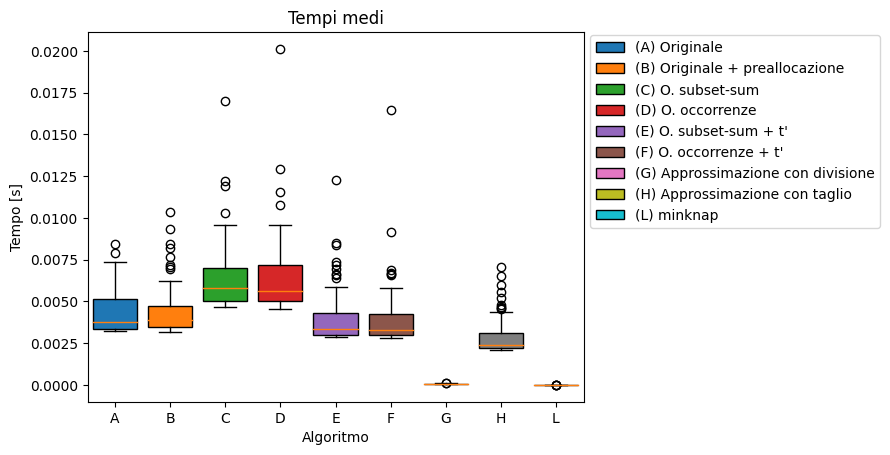

In [9]:
# tempi medi (OK)
# fig, ax = plt.subplots()
# # Creazione dei boxplot
# val = df[df['type'] == i]
# #bp1 = ax.boxplot(val['time_original'], positions=[-5], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C0'))
# #bp2 = ax.boxplot(val['time_original_prealloc'], positions=[-4], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C1'))
# #bp3 = ax.boxplot(val['time_ks2_v1'], positions=[-3], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C2'))
# #bp4 = ax.boxplot(val['time_ks2_v2'], positions=[-2], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C3'))
# #bp5 = ax.boxplot(val['time_ks2_v2_1'], positions=[-1], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C4'))
# bp6 = ax.boxplot(val['time_ks2_v1_1_div'], positions=[0], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C5'))
# #bp7 = ax.boxplot(val['time_ks2_v2_1_cut'], positions=[1], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C6'))
# #bp8 = ax.boxplot(val['time_ks2_v1_nocol_noalloc'], positions=[2], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C7'))
# bp9 = ax.boxplot(val['time_fminknap'], positions=[3], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C8'))

# #ax.set_xticklabels(['A', 'B','C','D','E','F','G','H,'I'])
# ax.set_xticklabels(['F','I'])
# ax.set_xlabel('Tipo')
# ax.set_ylabel('Tempo [s]')
# plt.title(f"Tempi medi")
# ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Normale', 't\''], loc='upper left')
# # Visualizzazione del grafico
# plt.show()


fig, ax = plt.subplots()
# # Creazione dei boxplot
# val = df[df['type'] == i]
# bp1 = ax.boxplot(val['time_original'], positions=[-5], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C0'))
# bp2 = ax.boxplot(val['time_original_prealloc'], positions=[-4], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C1'))
# bp3 = ax.boxplot(val['time_ks2_v1'], positions=[-3], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C2'))
# bp4 = ax.boxplot(val['time_ks2_v2'], positions=[-2], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C3'))
# bp5 = ax.boxplot(val['time_ks2_v1_1'], positions=[-1], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C4'))
# bp6 = ax.boxplot(val['time_ks2_v2_1'], positions=[0], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C5'))
# bp7 = ax.boxplot(val['time_ks2_v1_1_div'], positions=[1], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C6'))
# bp8 = ax.boxplot(val['time_ks2_v2_1_cut'], positions=[2], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C7'))
# bp10 = ax.boxplot(val['time_fminknap'], positions=[3], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C9'))

# # Personalizzazione degli assi e della legenda
# ax.set_xticklabels(['A','B','C','D','E','F','G','H','L'])
# ax.set_xlabel('Algoritmo')
# ax.set_ylabel('Tempo [s]')
# plt.title('Tempi medi')
# ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0], bp5["boxes"][0], bp6["boxes"][0], bp7["boxes"][0], bp9["boxes"][0], bp10["boxes"][0]], ['(A) Originale', '(B) Originale + preallocazione', '(C) O. subset-sum', '(D) O. occorrenze', '(E) O. subset-sum + t\'', '(F) O. occorrenze + t\'', '(G) Approssimazione con divisione', '(H) Approssimazione con taglio', '(I) Calcolo subset sum + esecuzione senza prealloc.', '(L) minknap' ], loc='upper left', bbox_to_anchor=(1.00, 1.01))
# # Visualizzazione del grafico
# plt.show()


    # Creazione dei boxplot
val = df[df['type'] == i]
bp1 = ax.boxplot(val['time_original'], positions=[-5], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C0'))
bp2 = ax.boxplot(val['time_original_prealloc'], positions=[-4], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C1'))
bp3 = ax.boxplot(val['time_ks2_v1'], positions=[-3], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C2'))
bp4 = ax.boxplot(val['time_ks2_v2'], positions=[-2], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C3'))
bp5 = ax.boxplot(val['time_ks2_v1_1'], positions=[-1], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C4'))
bp6 = ax.boxplot(val['time_ks2_v2_1'], positions=[0], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C5'))
bp7 = ax.boxplot(val['time_ks2_v1_1_div'], positions=[1], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C6'))
bp8 = ax.boxplot(val['time_ks2_v2_1_cut'], positions=[2], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C7'))
bp10 = ax.boxplot(val['time_fminknap'], positions=[3], widths=0.8, patch_artist=True, boxprops=dict(facecolor='C9'))
# Personalizzazione degli assi e della legenda
ax.set_xticklabels(['A','B','C','D','E','F','G','H','L'])
ax.set_xlabel('Algoritmo')
ax.set_ylabel('Tempo [s]')
plt.title(f"Tempi medi")
# ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0], bp5["boxes"][0], bp6["boxes"][0], bp7["boxes"][0], bp10["boxes"][0]], ['(A) Originale', '(B) Originale + preallocazione', '(C) O. subset-sum', '(D) O. occorrenze', '(E) O. subset-sum + t\'', '(F) O. occorrenze + t\'', '(G) Approssimazione con divisione', '(H) Approssimazione con taglio', '(I) Calcolo subset sum + esecuzione senza prealloc.', '(L) minknap' ], loc='upper left', bbox_to_anchor=(1.00, 1.01))
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0], bp5["boxes"][0], bp6["boxes"][0], bp7["boxes"][0], bp9["boxes"][0], bp10["boxes"][0]], ['(A) Originale', '(B) Originale + preallocazione', '(C) O. subset-sum', '(D) O. occorrenze', '(E) O. subset-sum + t\'', '(F) O. occorrenze + t\'', '(G) Approssimazione con divisione', '(H) Approssimazione con taglio', '(L) minknap' ], loc='upper left', bbox_to_anchor=(1.00, 1.01))
    
# Visualizzazione del grafico
plt.show()

## Dimensione istanza

In [76]:
# grafico nel variare della dimensione dell'istanza (OK)

# n=100
# range=5000
# instanceNr=100
# capacity=...

# mode=0

# fino a 50:
# division=1
# cut=1

# fino a 80:
# division=10
# cut=10

# fino a 150:
# division=10
# cut=30

# fino a 500:
# division=100
# cut=30

files_list = {}
instance_nrs = {}
for i in range(10, 1000, 10):
    val = glob.glob(f'csv/all_instance_size/csv_c5000_n{i}_r*_fn*_mode*_div*_cut*.csv')
    
    if val != []:
        files_list[i] = val
        instance_nrs[i] = i

dataframe_size = []
instance_cont = {}
incr = 0
for i in files_list:
    for filename in files_list[i]:
        df = pd.read_csv(filename)
        #print(filename)
        df['n'] = i
        df['difference_v2'] = abs(df['res_original_alloc']-df['resOpt_v2_1_cut'])
        df['time_distance'] = df['time_ks2_v2_1'] - df['time_fminknap']
        df['difference_v1'] = abs(df['res_original_alloc']-df['resOpt_v1_1_div'])
        dataframe_size.append(df)

dataframe_size = pd.concat(dataframe_size, axis=0, ignore_index=True)
dataframe_size['n']

means_by_instancenr_n = dataframe_size.groupby(['n']).mean()
means_by_instancenr_types = dataframe_size.groupby(['n', 'type']).mean()
dataframe_size


C:\Users\loren\AppData\Local\Temp\ipykernel_23732\689263986.py:51: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_by_instancenr_n = dataframe_size.groupby(['n']).mean()


,type,capacity,n,mincap_v1_1_div_time,t_size_v1,s_size_v1,mincap_v1_time,t_size_v2,s_size_v2,mincap_v2_time,...,time_ks2_allocation_1_cut,time_ks2_v2_1_cut,resOpt_v2_1_cut,time_ks2_v1_nocol_noalloc,time_fminknap_allocation,time_fminknap,resFmin,difference_v2,time_distance,difference_v1
0,uncorr,5000,10,0.000057,5001,184,0.000482,5001,140,0.000317,...,0.000001,0.000015,597.442222,0.001039,0.000010,0.000004,10472.085473,9874.643251,0.000025,0.000000
1,uncorr,5000,10,0.000057,5001,184,0.000482,5001,140,0.000317,...,0.000001,0.000039,5034.657687,0.000699,0.000000,0.000003,5072.622309,37.964622,0.000017,0.000000
2,uncorr,5000,10,0.000057,5001,184,0.000482,5001,140,0.000317,...,0.000001,0.000036,3289.807825,0.000655,0.000000,0.000009,4870.906476,1581.098651,0.000019,0.000000
3,uncorr,5000,10,0.000057,5001,184,0.000482,5001,140,0.000317,...,0.000001,0.000037,6817.670523,0.000657,0.000000,0.000002,5861.396519,956.274004,0.000058,0.000000
4,uncorr,5000,10,0.000057,5001,184,0.000482,5001,140,0.000317,...,0.000001,0.000034,6672.381600,0.000640,0.000000,0.000002,7038.399897,366.018297,0.000011,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14297,str,5000,250,0.004333,5001,4816,0.426041,5001,4864,0.274500,...,0.001609,0.005333,9484.570813,0.445756,0.000001,0.000013,9629.800892,145.230079,0.005904,431.398723
14298,str,5000,250,0.004333,5001,4816,0.426041,5001,4864,0.274500,...,0.001598,0.005320,8850.938113,0.439428,0.000001,0.000012,9517.822880,666.884767,0.005754,205.954242
14299,str,5000,250,0.004333,5001,4816,0.426041,5001,4864,0.274500,...,0.001683,0.005302,9535.354362,0.453326,0.000000,0.000010,10068.577685,533.223323,0.005778,149.214123
14300,weak,5000,250,0.004320,5001,4664,0.424805,5001,4798,0.270932,...,0.001564,0.005184,7459.466246,0.433111,0.000001,0.000014,7989.596820,530.130574,0.005761,348.462602


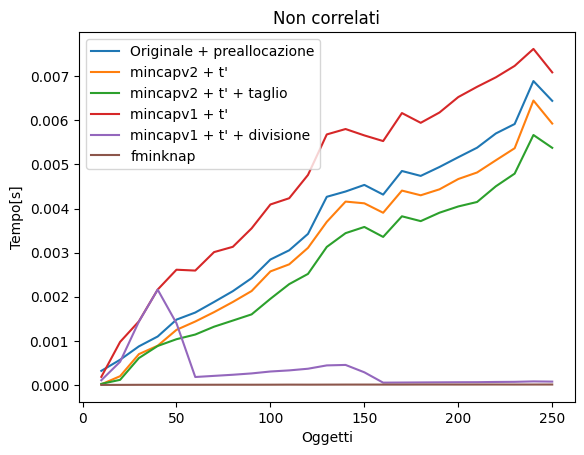

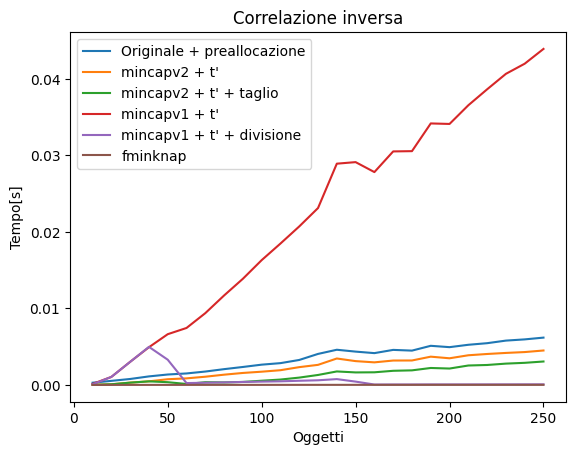

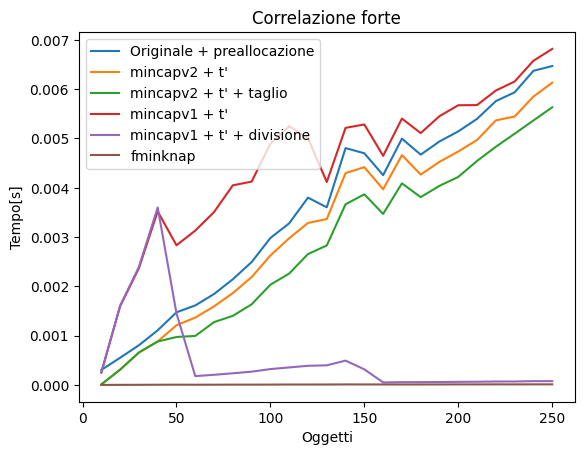

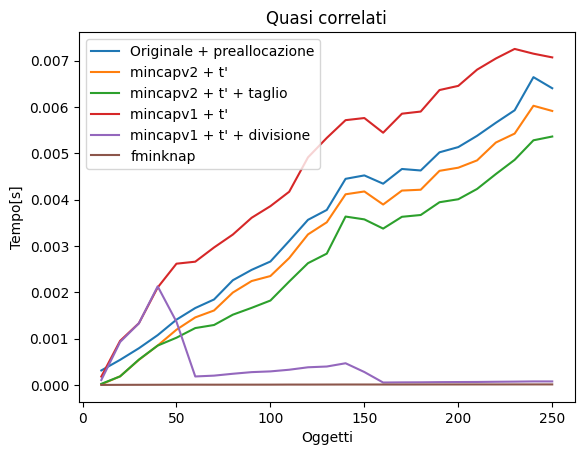

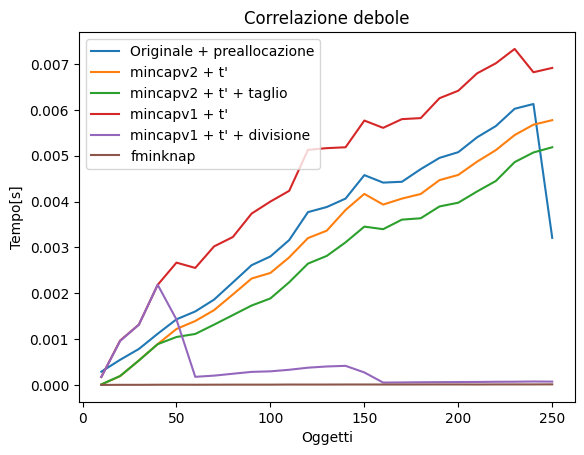

In [77]:
types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

nrs = dataframe_size['n'].unique()

for cont, i in enumerate(types):
    result1 = dataframe_size[dataframe_size['type']==i]
    
    sv1 = result1.groupby('n')['time_ks2_v2_1'].mean()
    sv2 = result1.groupby('n')['time_ks2_v2_1_cut'].mean()
    sv3 = result1.groupby('n')['time_original_prealloc'].mean()
    sv4 = result1.groupby('n')['time_fminknap'].mean()
    sv5 = result1.groupby('n')['time_ks2_v1_1'].mean()
    sv6 = result1.groupby('n')['time_ks2_v1_1_div'].mean()

    plt.plot(nrs, sv3, label='Originale + preallocazione')
    plt.plot(nrs, sv1, label='mincapv2 + t\'')
    plt.plot(nrs, sv2, label='mincapv2 + t\' + taglio')
    plt.plot(nrs, sv5, label='mincapv1 + t\'')
    plt.plot(nrs, sv6, label='mincapv1 + t\' + divisione')
    plt.plot(nrs, sv4, label='fminknap')

    plt.xlabel('Oggetti')
    plt.ylabel('Tempo[s]')
    plt.title(types_conv[cont])
    plt.legend()
    plt.show()
#dataframe_size.groupby('n')['time_ks2_v2_1'].mean()

## variare capacità

In [3]:
# grafico nel variare nella dimensione della capacità

# csv\all_instance_cap\csv_c*_n100_r*_fn100_mode0_div100_cut30.csv

# fino a 100:
# div 1
# cut 1

# fino a 1000:
# div 10
# cut 10

# oltre:
# div 100
# cut 30





files_list = {}
instance_nrs = {}
for i in range(10, 100020, 100):
    val = glob.glob(f'csv/all_instance_cap/csv_c{i}_n100_r{i}_fn100_mode0_div*_cut*.csv')

    if val != []:
        files_list[i] = val
        instance_nrs[i] = i

dataframe_nr = []
instance_cont = {}
incr = 0
for i in files_list:
    for filename in files_list[i]:
        df = pd.read_csv(filename)
        # print(filename)
        df['n'] = i
        df['difference_v2'] = abs(df['res_original_alloc']-df['resOpt_v2_1_cut'])
        df['time_distance'] = df['time_ks2_v2_1'] - df['time_fminknap']
        df['difference_v1'] = abs(df['res_original_alloc']-df['resOpt_v1_1_div'])
        dataframe_nr.append(df)

dataframe_cap = pd.concat(dataframe_nr, axis=0, ignore_index=True)
dataframe_cap

# means_by_instancenr_n = dataframe_cap.groupby(['n']).mean()
# means_by_instancenr_types = dataframe_cap.groupby(['n', 'type']).mean()

,type,capacity,n,mincap_v1_1_div_time,t_size_v1,s_size_v1,mincap_v1_time,t_size_v2,s_size_v2,mincap_v2_time,...,time_ks2_allocation_1_cut,time_ks2_v2_1_cut,resOpt_v2_1_cut,time_ks2_v1_nocol_noalloc,time_fminknap_allocation,time_fminknap,resFmin,difference_v2,time_distance,difference_v1
0,uncorr,10,10,0.000035,11,11,0.000163,11,11,0.000106,...,0.000005,0.000008,39.832601,0.000180,0.000005,0.000005,42.129791,2.297190,0.000005,30.922006
1,uncorr,10,10,0.000035,11,11,0.000163,11,11,0.000106,...,0.000006,0.000007,43.347722,0.000178,0.000000,0.000002,47.691240,4.343518,0.000006,35.957243
2,uncorr,10,10,0.000035,11,11,0.000163,11,11,0.000106,...,0.000003,0.000008,37.548432,0.000178,0.000000,0.000008,42.485101,4.936669,0.000001,29.512056
3,uncorr,10,10,0.000035,11,11,0.000163,11,11,0.000106,...,0.000003,0.000008,27.014256,0.000181,0.000000,0.000002,29.390331,2.376075,0.000006,20.638616
4,uncorr,10,10,0.000035,11,11,0.000163,11,11,0.000106,...,0.000002,0.000007,33.150426,0.000192,0.000000,0.000002,36.577931,3.427505,0.000006,23.027755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38495,weak,100010,100010,0.004355,100011,95897,0.435783,100011,96777,0.308714,...,0.036790,0.074833,146391.721620,0.000001,0.000001,0.000019,149423.254038,3031.532418,0.076294,120.206559
38496,weak,100010,100010,0.004355,100011,95897,0.435783,100011,96777,0.308714,...,0.036898,0.080666,186217.321220,0.000000,0.000001,0.000010,190223.657833,4006.336613,0.073971,1110.683931
38497,weak,100010,100010,0.004355,100011,95897,0.435783,100011,96777,0.308714,...,0.037249,0.074568,160017.882317,0.000001,0.000001,0.000014,163480.683618,3462.801301,0.074743,104.170041
38498,weak,100010,100010,0.004355,100011,95897,0.435783,100011,96777,0.308714,...,0.036774,0.074205,151706.348816,0.000001,0.000001,0.000012,157112.983400,5406.634584,0.075778,1073.211605


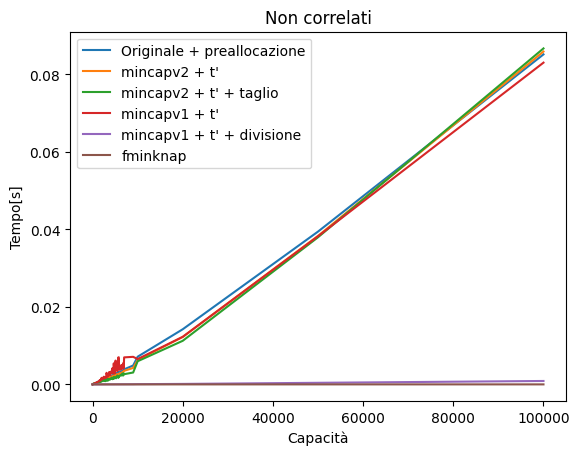

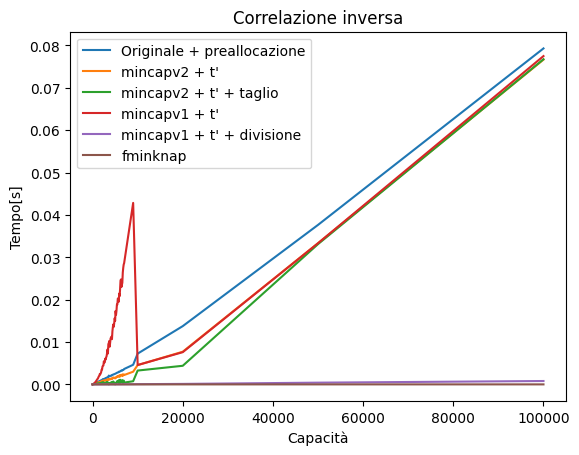

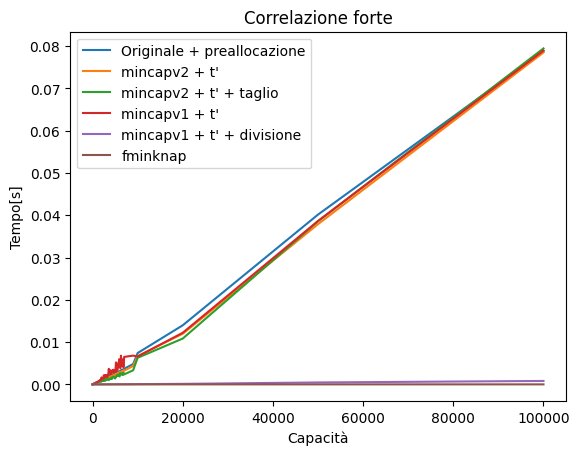

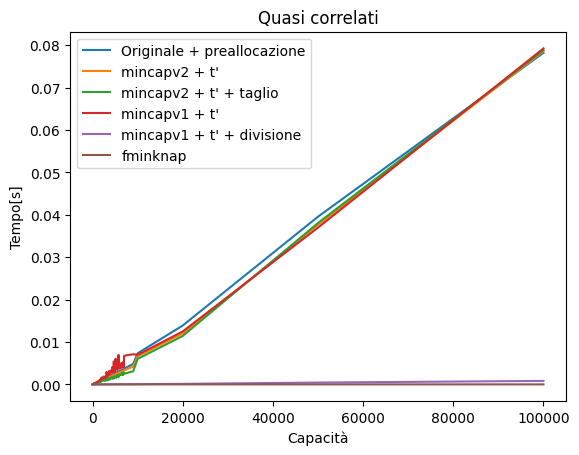

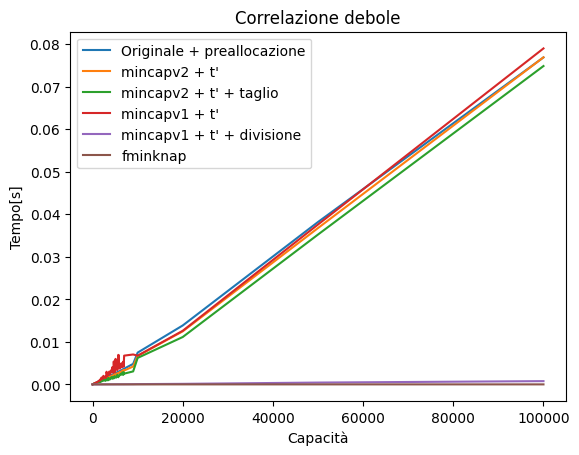

mean


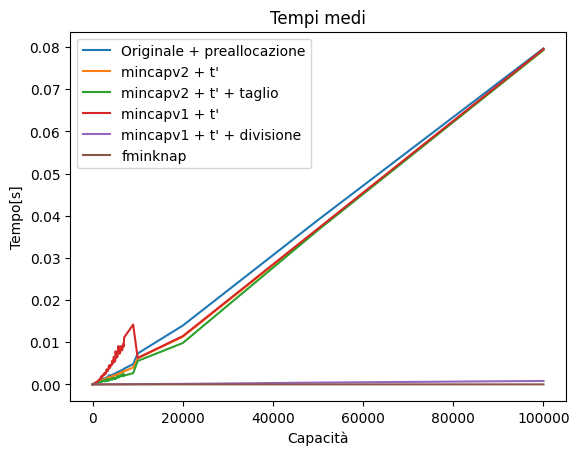

,time_ks2_v2_1,time_ks2_v2_1_cut,time_original_prealloc,time_fminknap,time_ks2_v1_1,time_ks2_v1_1_div
n,,,,,,
10,0.000010,0.000009,0.000009,0.000003,0.000010,0.000007
110,0.000060,0.000054,0.000065,0.000005,0.000069,0.000002
210,0.000112,0.000119,0.000124,0.000006,0.000131,0.000003
310,0.000183,0.000147,0.000202,0.000008,0.000217,0.000005
410,0.000194,0.000153,0.000223,0.000006,0.000242,0.000005
...,...,...,...,...,...,...
9010,0.004010,0.002668,0.004796,0.000008,0.014186,0.000057
10010,0.006177,0.005565,0.007336,0.000010,0.006289,0.000074
20010,0.011295,0.009816,0.013948,0.000009,0.011445,0.000134


In [4]:
types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

nrs = dataframe_cap['n'].unique()

for cont, i in enumerate(types):
    result1 = dataframe_cap[dataframe_cap['type']==i]
    sv1 = result1.groupby('n')['time_ks2_v2_1'].mean()
    sv2 = result1.groupby('n')['time_ks2_v2_1_cut'].mean()
    sv3 = result1.groupby('n')['time_original_prealloc'].mean()
    sv4 = result1.groupby('n')['time_fminknap'].mean()
    sv5 = result1.groupby('n')['time_ks2_v1_1'].mean()
    sv6 = result1.groupby('n')['time_ks2_v1_1_div'].mean()

    plt.plot(nrs, sv3, label='Originale + preallocazione')
    plt.plot(nrs, sv1, label='mincapv2 + t\'')
    plt.plot(nrs, sv2, label='mincapv2 + t\' + taglio')
    plt.plot(nrs, sv5, label='mincapv1 + t\'')
    plt.plot(nrs, sv6, label='mincapv1 + t\' + divisione')
    plt.plot(nrs, sv4, label='fminknap')
    plt.xlabel('Capacità')
    plt.ylabel('Tempo[s]')
    plt.title(types_conv[cont])
    plt.legend()
    plt.show()


print("mean")
sv1 = dataframe_cap.groupby('n')['time_ks2_v2_1'].mean()
sv2 = dataframe_cap.groupby('n')['time_ks2_v2_1_cut'].mean()
sv3 = dataframe_cap.groupby('n')['time_original_prealloc'].mean()
sv4 = dataframe_cap.groupby('n')['time_fminknap'].mean()
sv5 = dataframe_cap.groupby('n')['time_ks2_v1_1'].mean()
sv6 = dataframe_cap.groupby('n')['time_ks2_v1_1_div'].mean()

plt.plot(nrs, sv3, label='Originale + preallocazione')
plt.plot(nrs, sv1, label='mincapv2 + t\'')
plt.plot(nrs, sv2, label='mincapv2 + t\' + taglio')
plt.plot(nrs, sv5, label='mincapv1 + t\'')
plt.plot(nrs, sv6, label='mincapv1 + t\' + divisione')
plt.plot(nrs, sv4, label='fminknap')
plt.xlabel('Capacità')
plt.ylabel('Tempo[s]')
plt.title('Tempi medi')
plt.legend()
plt.show()

group = dataframe_cap[['n','time_ks2_v2_1','time_ks2_v2_1_cut','time_original_prealloc','time_fminknap','time_ks2_v1_1','time_ks2_v1_1_div']].groupby('n')

mean = group.mean()
var =  group.var()

mean


## Numero instanze

In [79]:
# grafico del tempo totale nel variare del numero di istanze (OK)

# csv/all_instance_nr\csv_c50000_n100_r50000_fn1_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn11_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn21_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn31_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn41_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn51_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn61_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn71_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn81_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn91_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn101_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn501_mode0_div10_cut30.csv
# csv/all_instance_nr\csv_c50000_n100_r50000_fn1001_mode0_div10_cut30.csv

files_list = {}
instance_nrs = {}
for i in range(1, 1002, 10):
    val = glob.glob(f'csv/all_instance_nr/csv_c50000_n100_r50000_fn{i}_mode0_div10_cut30.csv')

    if val != []:
        files_list[i] = val
        instance_nrs[i] = i

dataframe_nr = []
instance_cont = {}
incr = 0
for i in files_list:
    for filename in files_list[i]:
        df = pd.read_csv(filename)
        print(filename)
        df['n'] = i
        df['difference_v2'] = abs(df['res_original_alloc']-df['resOpt_v2_1_cut'])
        df['time_distance'] = df['time_ks2_v2_1'] - df['time_fminknap']
        df['difference_v1'] = abs(df['res_original_alloc']-df['resOpt_v1_1_div'])
        dataframe_nr.append(df)

dataframe_nr = pd.concat(dataframe_nr, axis=0, ignore_index=True)
dataframe_nr['n']

means_by_instancenr_n = dataframe_nr.groupby(['n']).mean()
means_by_instancenr_types = dataframe_nr.groupby(['n', 'type']).mean()
dataframe_nr.columns


csv/all_instance_nr/csv_c50000_n100_r50000_fn1_mode0_div10_cut30.csv
csv/all_instance_nr/csv_c50000_n100_r50000_fn11_mode0_div10_cut30.csv
csv/all_instance_nr/csv_c50000_n100_r50000_fn21_mode0_div10_cut30.csv
csv/all_instance_nr/csv_c50000_n100_r50000_fn31_mode0_div10_cut30.csv
csv/all_instance_nr/csv_c50000_n100_r50000_fn41_mode0_div10_cut30.csv
csv/all_instance_nr/csv_c50000_n100_r50000_fn51_mode0_div10_cut30.csv
csv/all_instance_nr/csv_c50000_n100_r50000_fn61_mode0_div10_cut30.csv
csv/all_instance_nr/csv_c50000_n100_r50000_fn71_mode0_div10_cut30.csv
csv/all_instance_nr/csv_c50000_n100_r50000_fn91_mode0_div10_cut30.csv
csv/all_instance_nr/csv_c50000_n100_r50000_fn101_mode0_div10_cut30.csv
csv/all_instance_nr/csv_c50000_n100_r50000_fn501_mode0_div10_cut30.csv


C:\Users\loren\AppData\Local\Temp\ipykernel_23732\2650575497.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_by_instancenr_n = dataframe_nr.groupby(['n']).mean()


Index(['type', 'capacity', 'n', 'mincap_v1_1_div_time', 't_size_v1',
       's_size_v1', 'mincap_v1_time', 't_size_v2', 's_size_v2',
       'mincap_v2_time', 't_size_v1_1', 's_size_v1_1', 'mincap_v1_1_time',
       't_size_v2_1', 's_size_v2_1', 'mincap_v2_1_time', 't_size_v1_1_div',
       's_size_v1_1_div', 'mincap_v1_1_div_time.1', 't_size_v2_1_cut',
       's_size_v2_1_cut', 'mincap_v2_1_cut_time', 'time_original',
       'time_original_allocation', 'time_original_prealloc',
       'res_original_alloc', 'time_ks2_v2_allocation', 'time_ks2_v2',
       'resOpt_v2', 'time_ks2_v1_allocation', 'time_ks2_v1', 'resOpt_v1',
       'time_ks2_v1_allocation_1', 'time_ks2_v1_1', 'resOpt_v1_1',
       'time_ks2_v2_allocation_1', 'time_ks2_v2_1', 'resOpt_v2_1',
       'time_ks2_v1_allocation_1_div', 'time_ks2_v1_1_div', 'resOpt_v1_1_div',
       'time_ks2_allocation_1_cut', 'time_ks2_v2_1_cut', 'resOpt_v2_1_cut',
       'time_ks2_v1_nocol_noalloc', 'time_fminknap_allocation',
       'time_fminkna

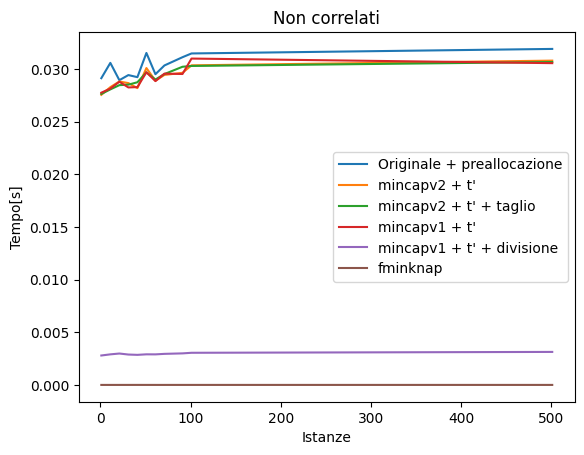

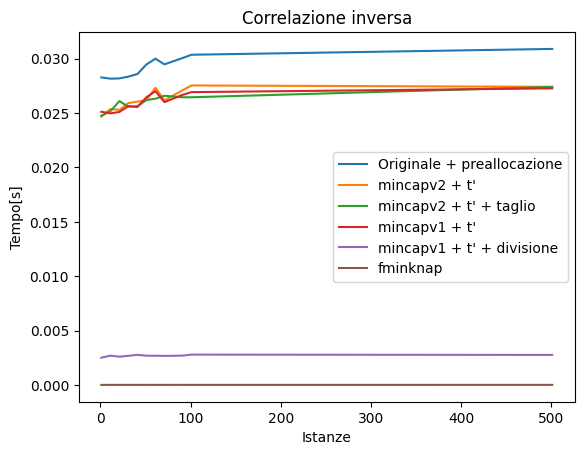

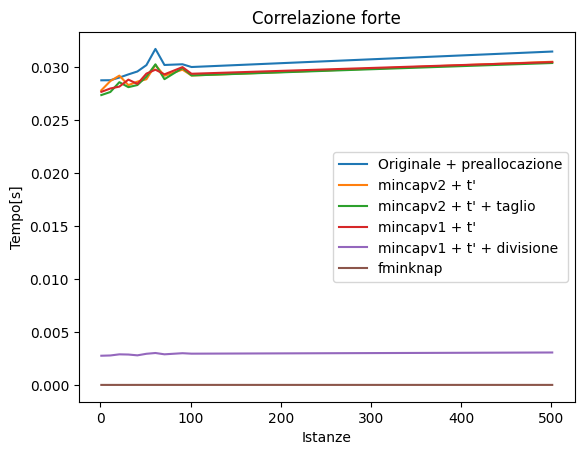

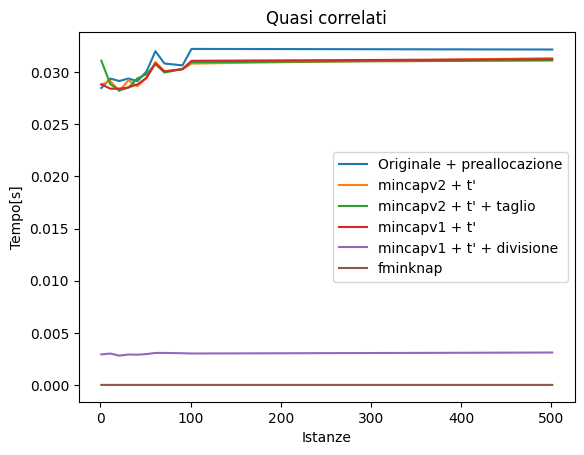

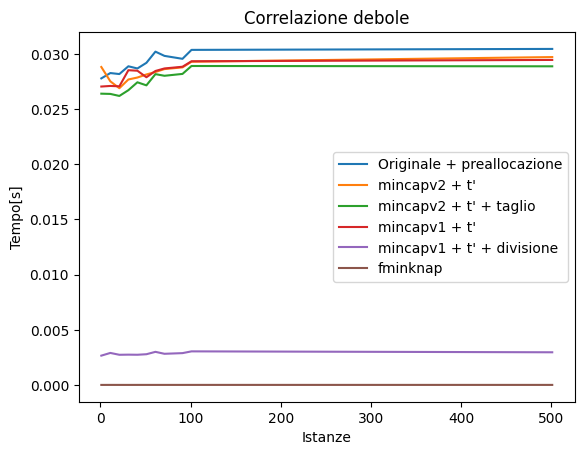

mean


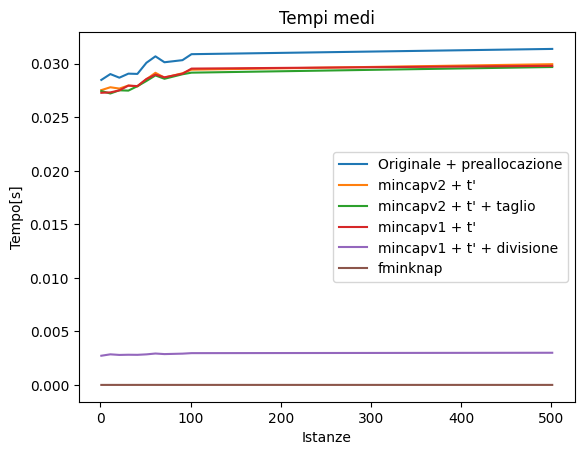

,time_ks2_v2_1,time_ks2_v2_1_cut,time_original_prealloc,time_fminknap,time_ks2_v1_1,time_ks2_v1_1_div
n,,,,,,
1,0.000003,0.000005,2.581067e-07,1.700000e-12,0.000002,2.560730e-08
11,0.000004,0.000002,4.944473e-06,3.113131e-12,0.000002,1.677058e-07
21,0.000008,0.000005,7.624648e-07,3.436447e-12,0.000005,7.296997e-08
31,0.000004,0.000002,1.322617e-06,7.850272e-12,0.000006,7.601023e-08
41,0.000003,0.000007,2.305329e-06,1.109794e-11,0.000004,2.820225e-07
51,0.000007,0.000006,9.011618e-06,8.781380e-12,0.000006,9.406135e-08
61,0.000018,0.000012,2.345602e-05,6.025712e-12,0.000009,2.921184e-07
71,0.000007,0.000010,7.828897e-06,7.857436e-12,0.000008,2.283269e-07
91,0.000014,0.000017,9.759444e-06,9.712330e-12,0.000013,2.041570e-07


In [80]:
types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

nrs = dataframe_nr['n'].unique()

# for cont, i in enumerate(types):
#     result1 = dataframe_nr[dataframe_nr['type']==i]
    
#     sv1 = result1.groupby('n')['time_ks2_v2_1'].mean()
#     sv2 = result1.groupby('n')['time_ks2_v2_1_cut'].mean()
#     sv3 = result1.groupby('n')['time_original_prealloc'].mean()
#     sv4 = result1.groupby('n')['time_original'].mean()

#     plt.plot(nrs, sv1, label='tempo senza taglio')
#     plt.plot(nrs, sv2, label='tempo con taglio')
#     plt.plot(nrs, sv3, label='tempo prealloc')
#     plt.plot(nrs, sv4, label='tempo originale')
#     plt.xlabel('cut_threshold')
#     plt.ylabel('time[s]')
#     plt.title(types_conv[cont])
#     plt.legend()
#     plt.show()

for cont, i in enumerate(types):
    result1 = dataframe_nr[dataframe_nr['type']==i]
    sv1 = result1.groupby('n')['time_ks2_v2_1'].mean()
    sv2 = result1.groupby('n')['time_ks2_v2_1_cut'].mean()
    sv3 = result1.groupby('n')['time_original_prealloc'].mean()
    sv4 = result1.groupby('n')['time_fminknap'].mean()
    sv5 = result1.groupby('n')['time_ks2_v1_1'].mean()
    sv6 = result1.groupby('n')['time_ks2_v1_1_div'].mean()

    plt.plot(nrs, sv3, label='Originale + preallocazione')
    plt.plot(nrs, sv1, label='mincapv2 + t\'')
    plt.plot(nrs, sv2, label='mincapv2 + t\' + taglio')
    plt.plot(nrs, sv5, label='mincapv1 + t\'')
    plt.plot(nrs, sv6, label='mincapv1 + t\' + divisione')
    plt.plot(nrs, sv4, label='fminknap')
    plt.xlabel('Istanze')
    plt.ylabel('Tempo[s]')
    plt.title(types_conv[cont])
    plt.legend()
    plt.show()


print("mean")
sv1 = dataframe_nr.groupby('n')['time_ks2_v2_1'].mean()
sv2 = dataframe_nr.groupby('n')['time_ks2_v2_1_cut'].mean()
sv3 = dataframe_nr.groupby('n')['time_original_prealloc'].mean()
sv4 = dataframe_nr.groupby('n')['time_fminknap'].mean()
sv5 = dataframe_nr.groupby('n')['time_ks2_v1_1'].mean()
sv6 = dataframe_nr.groupby('n')['time_ks2_v1_1_div'].mean()

plt.plot(nrs, sv3, label='Originale + preallocazione')
plt.plot(nrs, sv1, label='mincapv2 + t\'')
plt.plot(nrs, sv2, label='mincapv2 + t\' + taglio')
plt.plot(nrs, sv5, label='mincapv1 + t\'')
plt.plot(nrs, sv6, label='mincapv1 + t\' + divisione')
plt.plot(nrs, sv4, label='fminknap')
plt.xlabel('Istanze')
plt.ylabel('Tempo[s]')
plt.title('Tempi medi')
plt.legend()
plt.show()

group = dataframe_nr[['n','time_ks2_v2_1','time_ks2_v2_1_cut','time_original_prealloc','time_fminknap','time_ks2_v1_1','time_ks2_v1_1_div']].groupby('n')

mean = group.mean()
var =  group.var()

var 

In [87]:
total_time_fmin = dataframe_nr['time_fminknap'].sum()
total_time_ks = dataframe_nr.sum()
# print(total_time_ks.keys())
total_time_optimized = total_time_ks[['time_ks2_v2','time_ks2_v1','time_ks2_v1_1','time_ks2_v2_1','time_ks2_v1_1_div','time_ks2_v2_1_cut']]

# total_time_ks = dataframe_nr[['type','n','time_ks2_v2','time_ks2_v1','time_ks2_v1_1','time_ks2_v2_1','time_ks2_v1_1_div','time_ks2_v2_1_cut']].groupby(['n','type']).sum()
# total_time_fmin = dataframe_nr[['type','n','time_fminknap']].groupby(['n','type']).sum()
total_time_ks = dataframe_nr[['type','n','time_ks2_v2','time_ks2_v1','time_ks2_v1_1','time_ks2_v2_1','time_ks2_v1_1_div','time_ks2_v2_1_cut']].groupby(['type','n']).sum()
total_time_fmin = dataframe_nr[['type','n','time_fminknap']].groupby(['type','n']).sum()

distances = total_time_ks['time_ks2_v2_1'] - total_time_fmin['time_fminknap']
#total_time_ks



C:\Users\loren\AppData\Local\Temp\ipykernel_23732\3218067539.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_nr.groupby('n').sum()


,capacity,mincap_v1_1_div_time,t_size_v1,s_size_v1,mincap_v1_time,t_size_v2,s_size_v2,mincap_v2_time,t_size_v1_1,s_size_v1_1,...,time_ks2_allocation_1_cut,time_ks2_v2_1_cut,resOpt_v2_1_cut,time_ks2_v1_nocol_noalloc,time_fminknap_allocation,time_fminknap,resFmin,difference_v2,time_distance,difference_v1
n,,,,,,,,,,,,,,,,,,,,,
1,250000,0.131506,250005,237161,1.324857,250005,238429,0.837217,250005,237161,...,0.065335,0.137245,6.948348e+05,0.000000,0.000010,0.000036,7.024659e+05,7.631085e+03,0.137630,594.261616
11,2750000,1.455025,2750055,2608771,14.380366,2750055,2622719,9.062955,2750055,2608771,...,0.738100,1.497083,7.817839e+06,0.000025,0.000030,0.000458,7.855980e+06,3.814048e+04,1.528624,9997.087109
21,5250000,2.779749,5250105,4980381,28.121646,5250105,5007009,17.490732,5250105,4980381,...,1.426244,2.889308,1.514824e+07,0.000032,0.000060,0.000862,1.519879e+07,5.055434e+04,2.905359,18849.699546
31,7750000,4.088590,7750155,7351991,40.557052,7750155,7391299,25.983766,7750155,7351991,...,2.122141,4.260555,2.254299e+07,0.000064,0.000078,0.001268,2.262123e+07,7.824300e+04,4.332435,23262.820033
41,10250000,5.405768,10250205,9723601,52.970237,10250205,9775589,34.020365,10250205,9723601,...,2.825967,5.720280,2.925668e+07,0.000090,0.000123,0.001802,2.936953e+07,1.128426e+05,5.712773,27163.213615
51,12750000,6.833949,12750255,12095211,68.316183,12750255,12159879,43.101987,12750255,12095211,...,3.655550,7.238552,3.639997e+07,0.000136,0.000136,0.002265,3.654106e+07,1.410373e+05,7.276178,31602.560847
61,15250000,8.440387,15250305,14466821,82.104902,15250305,14544169,51.579404,15250305,14466821,...,4.364758,8.816308,4.309801e+07,0.000185,0.000129,0.002604,4.323502e+07,1.370121e+05,8.888742,41952.895726
71,17750000,9.541406,17750355,16838431,93.482931,17750355,16928459,60.574573,17750355,16838431,...,5.023996,10.150333,5.149863e+07,0.000176,0.000187,0.003086,5.167189e+07,1.732618e+05,10.184531,51974.794583
91,22750000,11.980514,22750455,21581651,129.837435,22750455,21697039,88.134046,22750455,21581651,...,6.486923,13.201724,6.450435e+07,0.000229,0.000268,0.003977,6.477314e+07,2.687890e+05,13.240804,54617.785281


mean


C:\Users\loren\AppData\Local\Temp\ipykernel_23732\2373054809.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sums = dataframe_nr.groupby('n').sum()


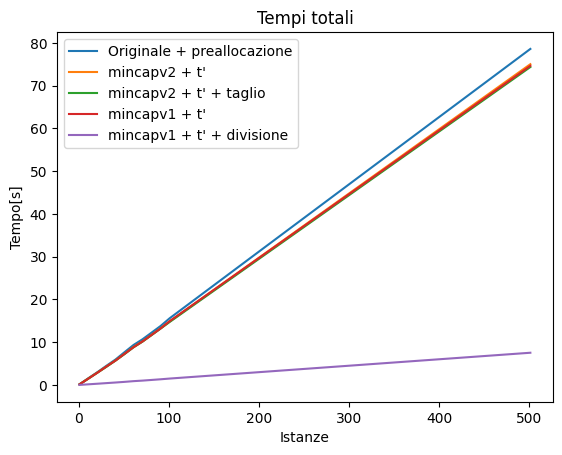

: 

In [94]:
print("mean")
sums = dataframe_nr.groupby('n').sum()


# sv1 = sums['time_fminknap']
# sv2 = sums['time_ks2_v2_1_cut']
# sv3 = sums['time_original']

# plt.plot(nrs, sv1, label='fminknap')
# plt.plot(nrs, sv2, label='mincapv2 + t\' + taglio')
# plt.plot(nrs, sv3, label='mincapv2 + t\' + taglio')
# plt.xlabel('Istanze')
# plt.ylabel('Tempo[s]')
# plt.title('Tempi totali')
# plt.legend()
# plt.show()

sv1 = sums['time_ks2_v2_1']
sv2 = sums['time_ks2_v2_1_cut']
sv3 = sums['time_original_prealloc']
sv4 = sums['time_fminknap']
sv5 = sums['time_ks2_v1_1']
sv6 = sums['time_ks2_v1_1_div']

plt.plot(nrs, sv3, label='Originale + preallocazione')
plt.plot(nrs, sv1, label='mincapv2 + t\'')
plt.plot(nrs, sv2, label='mincapv2 + t\' + taglio')
plt.plot(nrs, sv5, label='mincapv1 + t\'')
plt.plot(nrs, sv6, label='mincapv1 + t\' + divisione')
plt.plot(nrs, sv4, label='fminknap')
plt.xlabel('Istanze')
plt.ylabel('Tempo[s]')
plt.title('Tempi totali')
plt.legend()
plt.show()
# sv1 = total_time_fmin.groupby('n')['time_fminknap'].mean()
# sv2 = total_time_ks.groupby('n')['time_ks2_v2_1_cut'].mean()

# plt.plot(nrs, sv1, label='mincapv2 + t\'')
# plt.plot(nrs, sv2, label='mincapv2 + t\' + taglio')
# plt.xlabel('Istanze')
# plt.ylabel('Tempo[s]')
# plt.title('Tempi medi')
# plt.legend()
# plt.show()


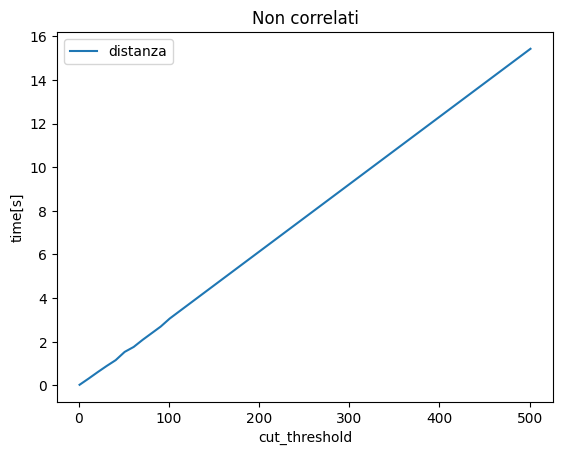

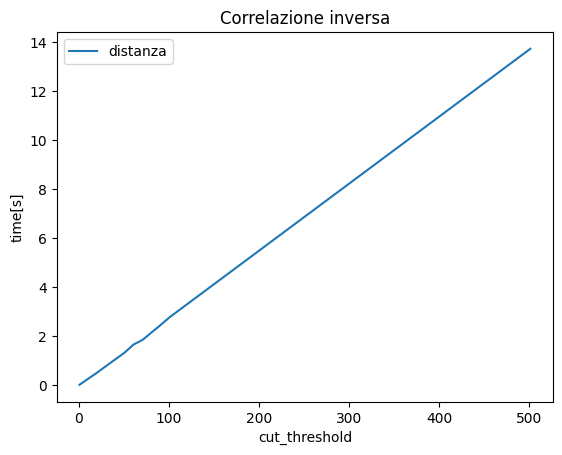

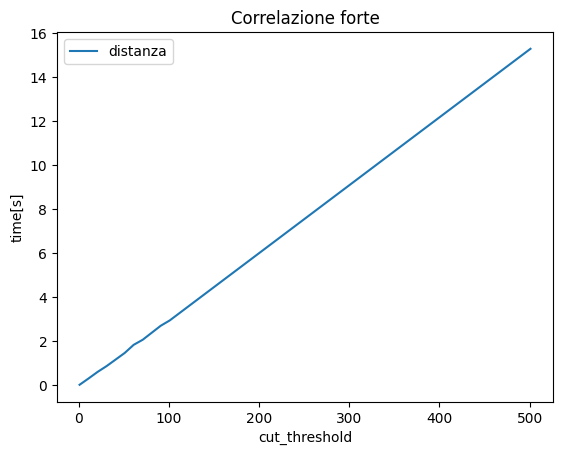

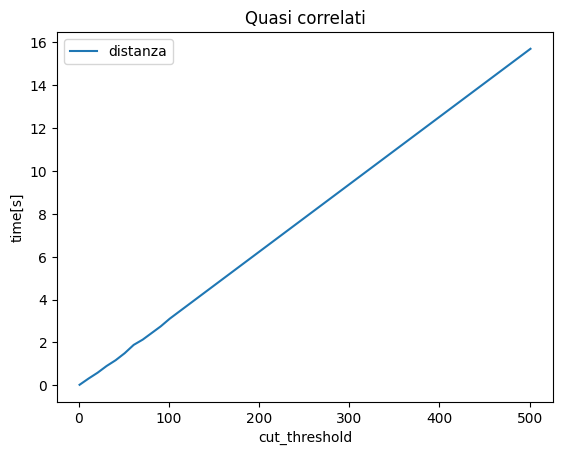

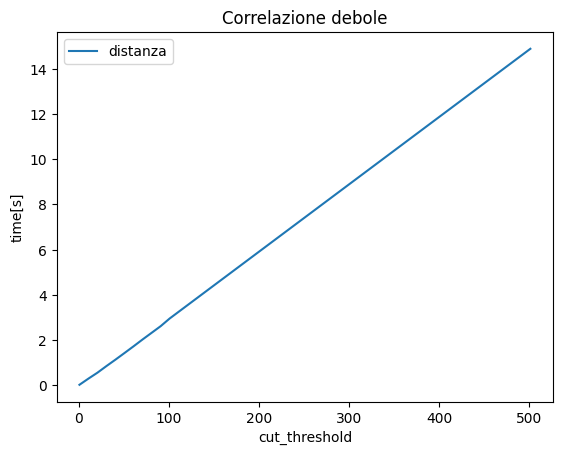

In [17]:
#time distance per tipo
distances = total_time_ks['time_ks2_v2_1'] - total_time_fmin['time_fminknap']

for cont, i in enumerate(types):
    result1 = distances[i]
    sv4 = result1

    plt.plot(nrs, sv4, label='distanza')
    plt.xlabel('cut_threshold')
    plt.ylabel('time[s]')
    plt.title(types_conv[cont])
    plt.legend()
    plt.show()

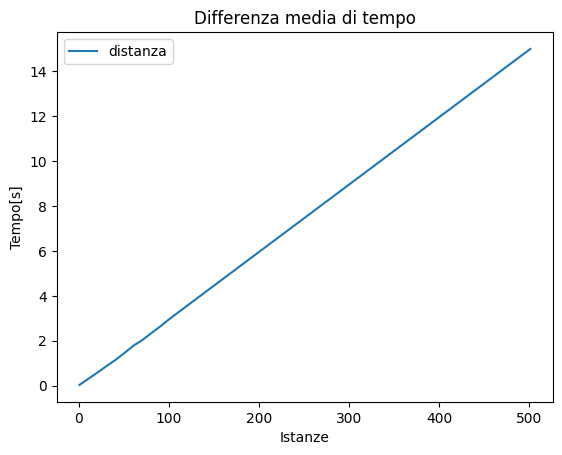

In [24]:
#time distance medio
distances = total_time_ks['time_ks2_v2_1'] - total_time_fmin['time_fminknap']

result1 = distances.groupby('n').mean()
sv4 = result1

plt.plot(nrs, sv4, label='distanza')
plt.xlabel('Istanze')
plt.ylabel('Tempo[s]')
plt.title('Differenza media di tempo')
plt.legend()
plt.show()

## Variare capacità + istanze

In [5]:
# n = c/2

# <100
# cut 1
# div 1

files_list = {}
instance_nrs = {}
for i in range(0, 3000, 10):
    val = glob.glob(f'csv/all_instance_cap_size/csv_c{i}_n*_r*_fn100_mode0_div*_cut*.csv')

    if val != []:
        files_list[i] = val
        instance_nrs[i] = i

dataframe_nr = []
instance_cont = {}
incr = 0
for i in files_list:
    for filename in files_list[i]:
        df = pd.read_csv(filename)
        #print(filename)
        df['n'] = i
        df['difference_v2'] = abs(df['res_original_alloc']-df['resOpt_v2_1_cut'])
        df['time_distance'] = df['time_ks2_v2_1'] - df['time_fminknap']
        df['difference_v1'] = abs(df['res_original_alloc']-df['resOpt_v1_1_div'])
        dataframe_nr.append(df)

dataframe_cap_size = pd.concat(dataframe_nr, axis=0, ignore_index=True)
dataframe_cap_size['n']

means_by_instancenr_n = dataframe_cap_size.groupby(['n']).mean()
means_by_instancenr_types = dataframe_cap_size.groupby(['n', 'type']).mean()
#dataframe_cap_size.columns



C:\Users\loren\AppData\Local\Temp\ipykernel_7048\602617824.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_by_instancenr_n = dataframe_cap_size.groupby(['n']).mean()


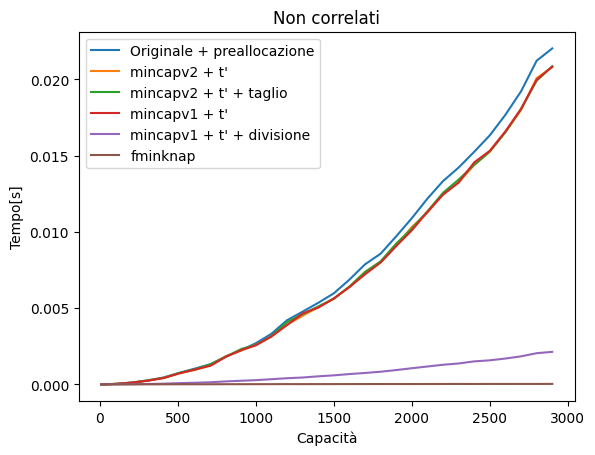

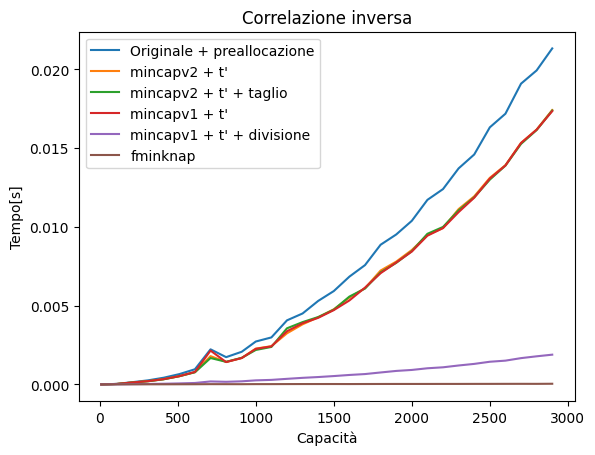

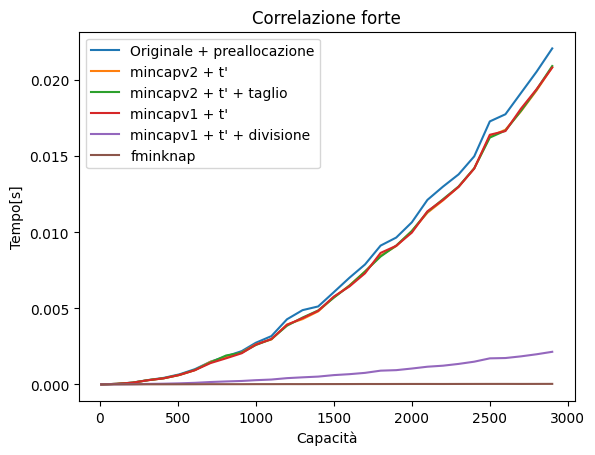

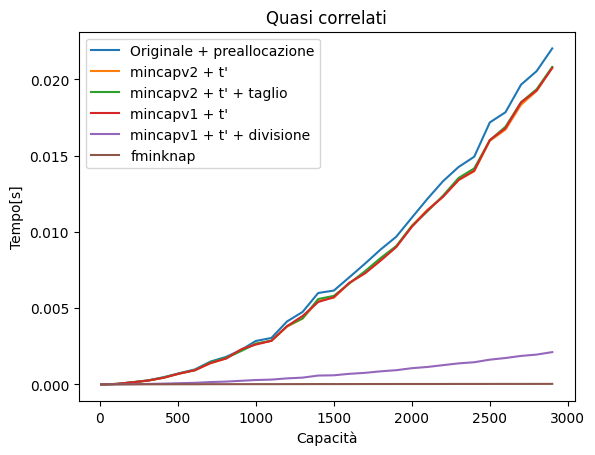

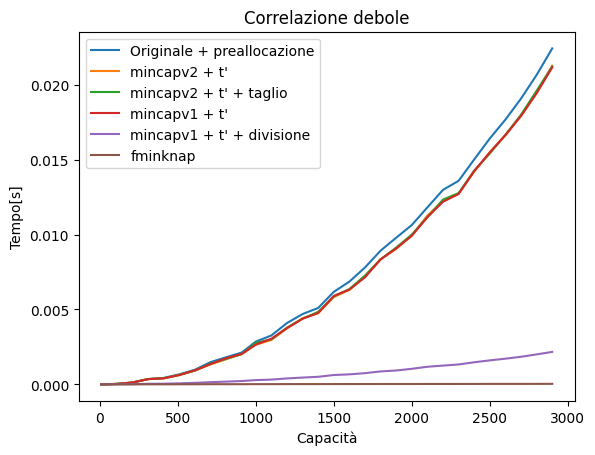

mean


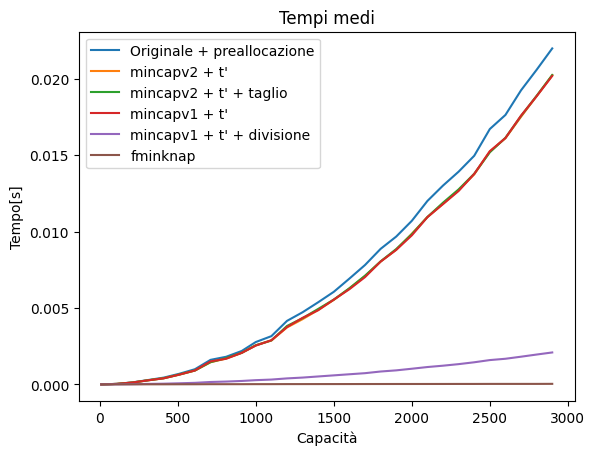

,time_ks2_v2_1,time_ks2_v2_1_cut,time_original_prealloc,time_fminknap,time_ks2_v1_1,time_ks2_v1_1_div
n,,,,,,
10,4.940000e-07,4.140000e-07,5.720000e-07,7.120000e-07,5.620000e-07,2.180000e-07
110,3.456400e-05,3.396600e-05,3.670200e-05,3.556000e-06,3.449400e-05,5.692000e-06
210,1.249060e-04,1.250240e-04,1.334340e-04,5.830000e-06,1.254760e-04,1.633000e-05
310,2.701020e-04,2.703200e-04,2.878820e-04,6.996000e-06,2.686860e-04,3.353400e-05
410,4.034440e-04,4.054040e-04,4.456620e-04,7.424000e-06,4.003180e-04,4.807600e-05
510,6.419680e-04,6.494520e-04,6.975040e-04,9.526000e-06,6.413980e-04,7.450800e-05
610,9.064220e-04,9.122520e-04,9.944280e-04,1.071400e-05,9.154360e-04,1.038560e-04
710,1.452434e-03,1.455842e-03,1.607718e-03,1.585000e-05,1.507912e-03,1.595480e-04
810,1.690192e-03,1.722108e-03,1.808892e-03,1.582400e-05,1.680444e-03,1.872320e-04


In [6]:
types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

nrs = dataframe_cap_size['n'].unique()

# for cont, i in enumerate(types):
#     result1 = dataframe_nr[dataframe_nr['type']==i]
    
#     sv1 = result1.groupby('n')['time_ks2_v2_1'].mean()
#     sv2 = result1.groupby('n')['time_ks2_v2_1_cut'].mean()
#     sv3 = result1.groupby('n')['time_original_prealloc'].mean()
#     sv4 = result1.groupby('n')['time_original'].mean()

#     plt.plot(nrs, sv1, label='tempo senza taglio')
#     plt.plot(nrs, sv2, label='tempo con taglio')
#     plt.plot(nrs, sv3, label='tempo prealloc')
#     plt.plot(nrs, sv4, label='tempo originale')
#     plt.xlabel('cut_threshold')
#     plt.ylabel('time[s]')
#     plt.title(types_conv[cont])
#     plt.legend()
#     plt.show()

for cont, i in enumerate(types):
    result1 = dataframe_cap_size[dataframe_cap_size['type']==i]
    sv1 = result1.groupby('n')['time_ks2_v2_1'].mean()
    sv2 = result1.groupby('n')['time_ks2_v2_1_cut'].mean()
    sv3 = result1.groupby('n')['time_original_prealloc'].mean()
    sv4 = result1.groupby('n')['time_fminknap'].mean()
    sv5 = result1.groupby('n')['time_ks2_v1_1'].mean()
    sv6 = result1.groupby('n')['time_ks2_v1_1_div'].mean()

    plt.plot(nrs, sv3, label='Originale + preallocazione')
    plt.plot(nrs, sv1, label='mincapv2 + t\'')
    plt.plot(nrs, sv2, label='mincapv2 + t\' + taglio')
    plt.plot(nrs, sv5, label='mincapv1 + t\'')
    plt.plot(nrs, sv6, label='mincapv1 + t\' + divisione')
    plt.plot(nrs, sv4, label='fminknap')
    plt.xlabel('Capacità')
    plt.ylabel('Tempo[s]')
    plt.title(types_conv[cont])
    plt.legend()
    plt.show()


print("mean")
sv1 = dataframe_cap_size.groupby('n')['time_ks2_v2_1'].mean()
sv2 = dataframe_cap_size.groupby('n')['time_ks2_v2_1_cut'].mean()
sv3 = dataframe_cap_size.groupby('n')['time_original_prealloc'].mean()
sv4 = dataframe_cap_size.groupby('n')['time_fminknap'].mean()
sv5 = dataframe_cap_size.groupby('n')['time_ks2_v1_1'].mean()
sv6 = dataframe_cap_size.groupby('n')['time_ks2_v1_1_div'].mean()

plt.plot(nrs, sv3, label='Originale + preallocazione')
plt.plot(nrs, sv1, label='mincapv2 + t\'')
plt.plot(nrs, sv2, label='mincapv2 + t\' + taglio')
plt.plot(nrs, sv5, label='mincapv1 + t\'')
plt.plot(nrs, sv6, label='mincapv1 + t\' + divisione')
plt.plot(nrs, sv4, label='fminknap')
plt.xlabel('Capacità')
plt.ylabel('Tempo[s]')
plt.title('Tempi medi')
plt.legend()
plt.show()

group = dataframe_cap_size[['n','time_ks2_v2_1','time_ks2_v2_1_cut','time_original_prealloc','time_fminknap','time_ks2_v1_1','time_ks2_v1_1_div']].groupby('n')

mean = group.mean()
var =  group.var()

mean